In [1]:
import numpy as np
from math import *   
import matplotlib.pyplot as plt
import pandas as pd

Нужно получить сведения о объеме торгов, ценам бумаг, волатильность, наш объем, лучшим bid/ask.

Make GBM plot

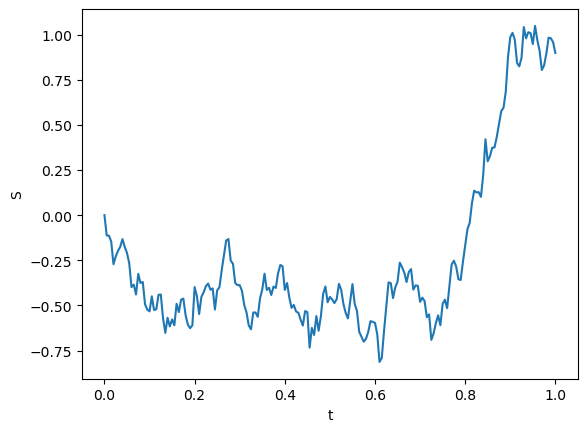

In [2]:
# Model parameters (assume r=0)
s0 = 100
# t = 1
T = 1
sigma = 0.2


N = 200         # number of time steps

dt = T / N
timeline = np.linspace(0, T, N+1)

# Brownian increments and trajectories
dW = sqrt(dt) * np.random.randn(N)
S = np.concatenate([np.zeros(1), np.cumsum(dW, axis=0)])

# Stock prices
# S = s0*np.exp(sigma*W - sigma**2 / 2*timeline )

plt.plot(timeline, S)
plt.xlabel("t")
plt.ylabel("S")
plt.show()

Make indifference price plot

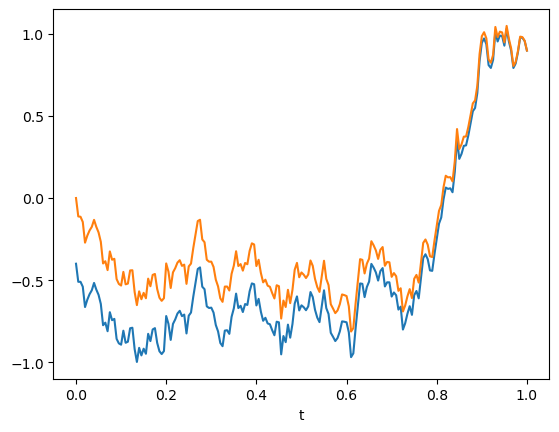

In [3]:
# state for algorithm
q = 100
gamma = 0.1
k = 1.5
A = 140

indifference_price = S - q * gamma * sigma**2 * (T - timeline)

plt.plot(timeline, indifference_price)
plt.plot(timeline, S)
plt.xlabel("t")
# plt.ylabel("S")
plt.show()

Make bid/ask quote(for one share)

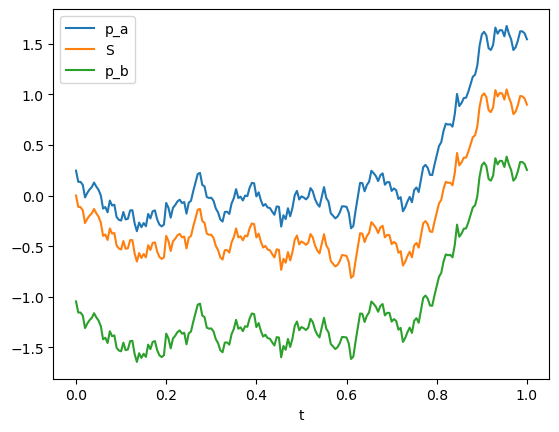

In [4]:
# spred_of_indif_price = gamma * sigma**2 * (T - timeline) + 2 / gamma * log(1 + gamma / k)
spred_of_indif_price =  2 / gamma * log(1 + gamma / k)
# gamma = 

p_a = indifference_price + spred_of_indif_price / 2
p_b = indifference_price - spred_of_indif_price / 2

plt.plot(timeline, p_a, label="p_a")
plt.plot(timeline, S, label="S")
plt.plot(timeline, p_b, label="p_b")
plt.xlabel("t")
plt.legend()
plt.show()

In [11]:
high_bid = pd.read_json("high_bid.json")
np.unique(high_bid.to_numpy(), return_counts=True)

(array([  0.   , 101.721, 101.759, 101.806, 102.03 , 102.031, 102.032,
        102.033, 102.034, 102.035, 102.036, 102.037, 102.038, 102.039,
        102.04 , 102.041, 102.042, 102.043, 102.049, 102.05 , 102.051,
        102.054, 102.055, 102.056, 102.057, 102.058, 102.059, 102.06 ,
        102.062, 102.065, 102.066, 102.067, 102.068, 102.069, 102.07 ,
        102.071, 102.074, 102.075, 102.077, 102.078, 102.079, 102.08 ,
        102.081, 102.082, 102.083, 102.084, 102.085, 102.086, 102.089,
        102.09 , 102.091, 102.095, 102.098, 102.099, 102.1  , 102.101,
        102.128, 102.131, 102.136, 102.176, 102.179, 102.18 , 102.54 ,
        102.543, 102.551, 102.559, 102.56 , 102.565, 102.566, 102.576,
        102.584, 102.587, 102.589, 102.59 , 102.595, 102.6  , 102.601,
        102.7  , 103.   ]),
 array([  5,   2,   1,  18,  73,  12,  79,  29,   5,   1,  38, 102, 195,
         30, 149, 164,  30,   4,  18,  89,   4,   3, 214, 424, 107, 113,
          1,  22,   1,   2,  25,   7,   8,  3

<Axes: >

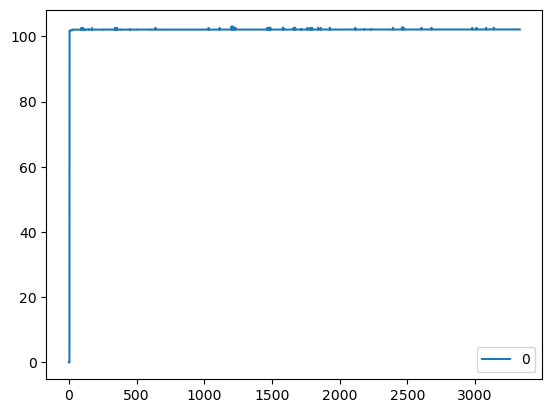

In [12]:
high_bid[:5].plot()

In [7]:
low_ask = pd.read_json("low_ask.json")
np.unique(low_ask.to_numpy(), return_counts=True)

(array([101.034, 101.52 , 101.522, 101.53 , 101.558, 101.567, 101.569,
        101.572, 102.   , 102.016, 102.03 , 102.032, 102.033, 102.036,
        102.037, 102.038, 102.04 , 102.041, 102.042, 102.05 , 102.059,
        102.06 , 102.061, 102.062, 102.063, 102.064, 102.065, 102.066,
        102.067, 102.068, 102.069, 102.07 , 102.079, 102.08 , 102.081,
        102.082, 102.083, 102.084, 102.085, 102.086, 102.087, 102.088,
        102.089, 102.09 , 102.091, 102.145, 102.198, 102.26 , 102.28 ,
        102.31 , 102.5  ]),
 array([   2,    4,    2,    2,    4,    2,    2,    2,    4,    2,    2,
          18,   28,    6,    6, 2358,  121,    4,   11,   76,   34,    3,
           4,   16,   15,    2,    3,    2,   29,    7,   14,    4,    5,
           5,   41,   24,    8,    7,   18,   10,    2,  281,    3,   39,
          54,   29,    3,   11,    1,    1,    1]))

<Axes: >

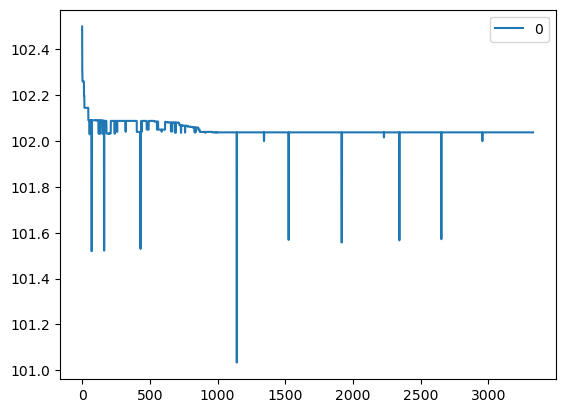

In [8]:
low_ask.plot()

<Axes: >

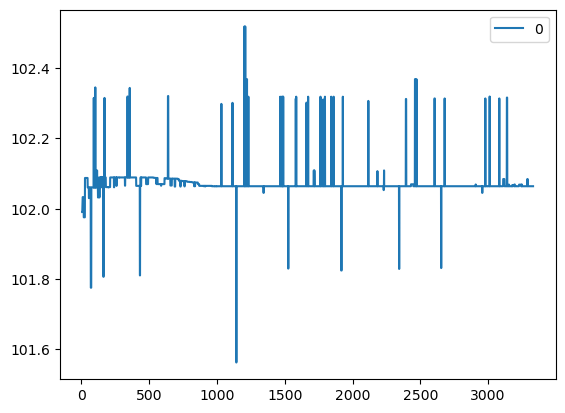

In [10]:
mid_price = (high_bid + low_ask) / 2
mid_price[5:].plot()